In [21]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')

In [22]:
X = df.drop(columns = 'quality')

In [28]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [61]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X)

In [62]:
import matplotlib.pyplot as plt
def display_cluster(X,km=[],num_clusters = 0):
    color = 'brgcmyk'
    alpha = 0.5
    size = 20
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c = color[0], alpha = alpha, s = size)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i], alpha = alpha, s=size)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

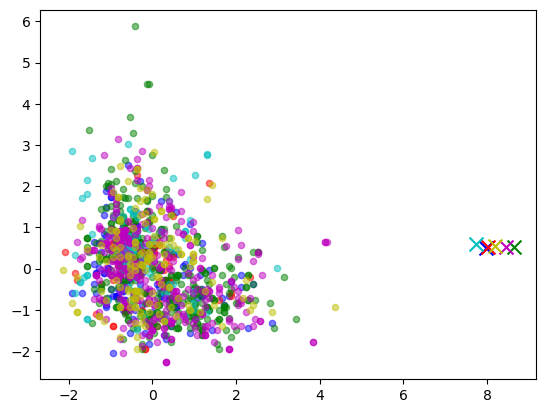

In [64]:
display_cluster(X_std,km,6)

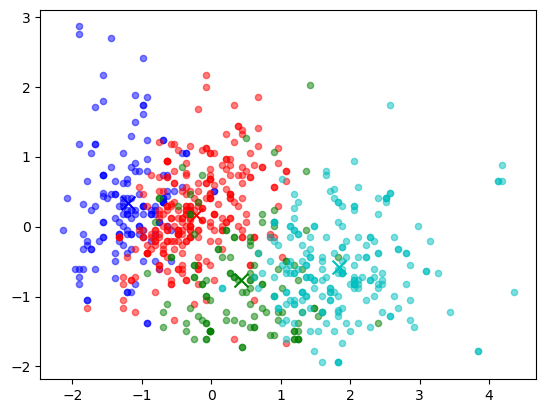

In [56]:
display_cluster(X_std,km,4)

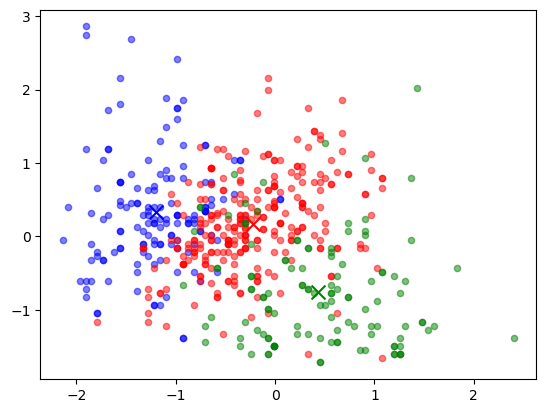

In [57]:
display_cluster(X_std,km,3)

In [58]:
km.inertia_


7785.436584179259

C:\Users\atber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\atber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\atber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\atber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

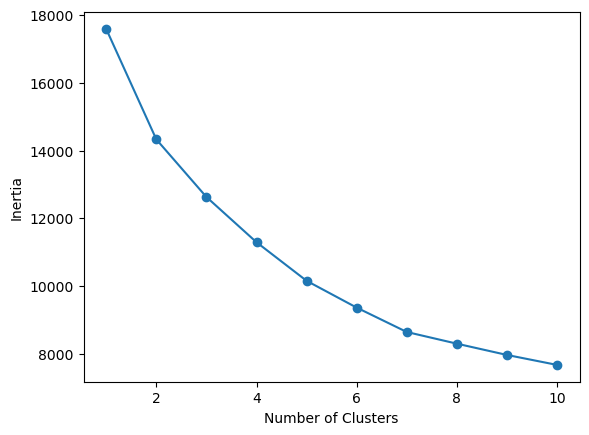

In [66]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_std)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [67]:
df['k-means'] = km.predict(X_std)

In [68]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k-means
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,7
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,9
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,7
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,3
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,3


In [69]:
(df[['quality','k-means']]
 .groupby(['quality','k-means'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
quality k-means        
3       2             2
        3             1
        7             7
4       0             5
        1             8
        2             3
        3             3
        4             2
        5             1
        6             1
        7            28
        8             1
        9             1
5       0            25
        1           134
        2            56
        3            54
        4            14
        5            25
        6            22
        7           179
        8            16
        9           156
6       0            70
        1            93
        2            89
        3           106
        4             6
        5            12
        6            97
        7           124
        8             6
        9            35
7       0            25
        1             6
        2            29
        3            23
        4             1
        5             5
        6            90
        7            17
        8             1
        9             2
8       0             4
        2             2
        3             1
        6            11

In [70]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(X_std)
df['agglom'] = ag.fit_predict(X_std)

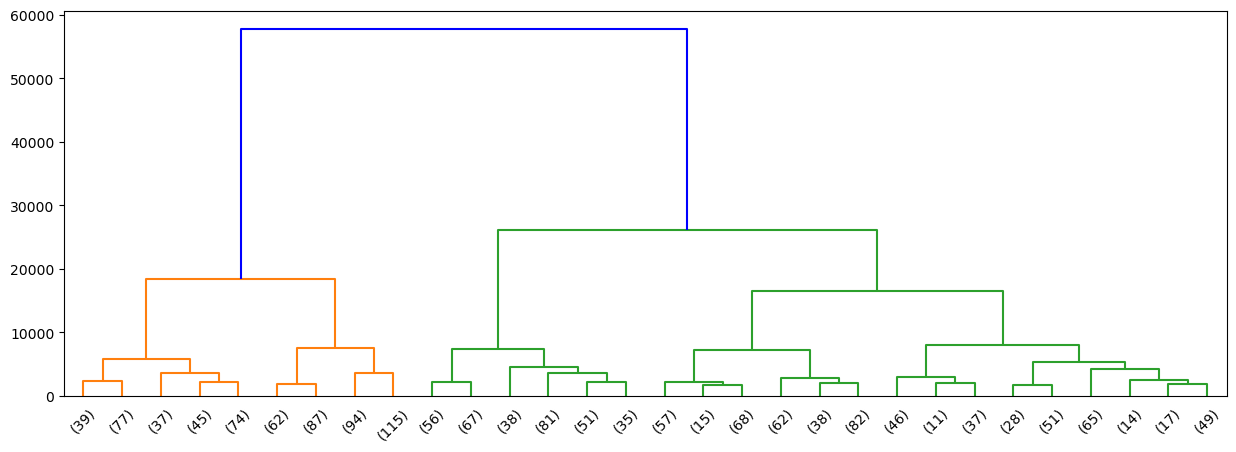

In [71]:
from scipy.cluster import hierarchy

H = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(H, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')
### END SOLUTION

In [79]:
df[['quality','agglom']] .groupby(['quality','agglom']) .size().to_frame()
 

0
quality agglom     
3       0         1
        1         7
        3         1
        5         1
4       0         7
        1        34
        2         5
        3         1
        4         4
        5         1
        6         1
5       0       240
        1       278
        2        56
        3        17
        4        25
        5        35
        6        30
6       0       162
        1       191
        2       152
        3        13
        4        49
        5        56
        6        15
7       0        26
        1        20
        2       102
        3         1
        4        18
        5        30
        6         2
8       0         1
        2        12
        4         3
        5         2

In [81]:
from sklearn.cluster import MeanShift
ms  = MeanShift(bandwidth= 3) 
ms = ms.fit(X_std)

In [83]:
df['MeanShift'] = ms.fit_predict(X_std)

In [84]:
df[['quality','MeanShift']] .groupby(['quality','MeanShift']) .size().to_frame()


0
quality MeanShift     
3       0           10
4       0           48
        5            1
        12           1
        14           1
        15           1
        18           1
5       0          611
        1           15
        2            1
        3            2
        4            2
        5           15
        6            4
        8           12
        9            9
        10           1
        11           1
        13           1
        14           4
        18           3
6       0          574
        1            6
        2            8
        3            2
        4            3
        5           23
        6            3
        8            4
        9            1
        14           1
        16           1
        17           1
        18          11
7       0          163
        1            1
        2            4
        5           17
        6            1
        7            2
        14           1
        18          10
8       0           12
        2            1
        5            2
        18           3

In [85]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1.5, min_samples=8, metric='euclidean')
dbs = dbs.fit(X_std)

In [86]:
df['db'] = dbs.fit_predict(X_std)

In [91]:
df[['quality','db']].groupby(['quality','db']).size().to_frame()

0
quality db     
3       -1    7
         0    3
4       -1   18
         0   35
5       -1  165
         0  516
6       -1  152
         0  484
         1    2
7       -1   60
         0  134
         1    5
8       -1   10
         0    8